# 01. Importing libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import data

In [2]:
# create a path

path = r'C:\\Users\\Richard\\Desktop\\Instacart Basket Analysis'

In [3]:
# Import data

ords_prods_merge_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_all.pkl'))

In [4]:
ords_prods_merge_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,frequency_flag,first_name,last_name,Gender,STATE,Age,number_of_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,True,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


# 03. Bar chart

<Axes: xlabel='orders_day_of_week'>

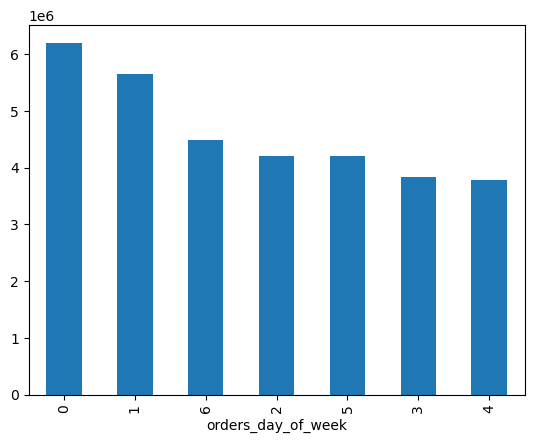

In [5]:
#2 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
# Create a bar chart from the orders_day_of_week column

ords_prods_merge_all['orders_day_of_week'].value_counts().plot.bar()

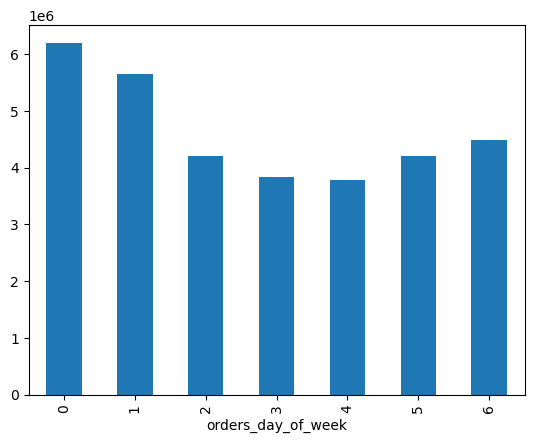

In [6]:
# Changing the order of the columns to go from 0-6

bar = ords_prods_merge_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Showing values for each day shown in the bar chart

ords_prods_merge_all['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [8]:
# Saving the chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_4.png'))

# 04. Histogram and scatterplot

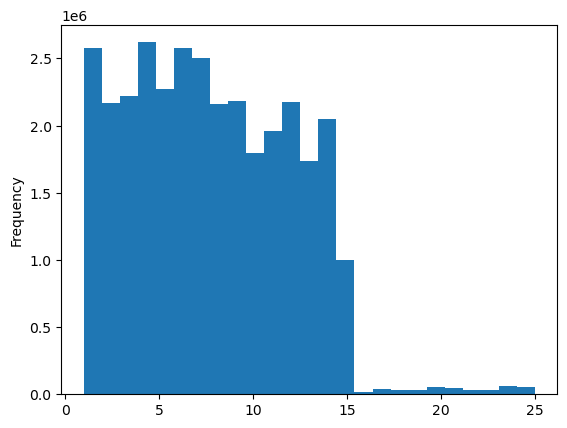

In [9]:
# Creating a histogram from the prices column

hist = ords_prods_merge_all['prices'].plot.hist(bins = 25)

In [10]:
ords_prods_merge_all['prices'].mean()

7.790994092173359

In [11]:
ords_prods_merge_all['prices'].median()

7.4

In [12]:
ords_prods_merge_all['prices'].max()

25.0

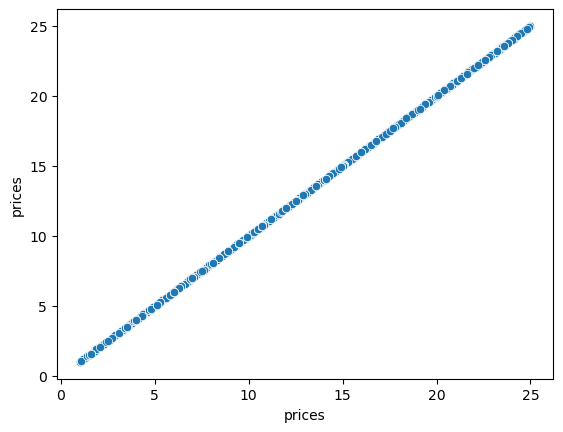

In [13]:
# Creating a scatterplot with the prices column

scatter = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge_all)

In [14]:
# Saving the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow_4.png'))

In [15]:
# Saving the scatterplot

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices_dow_4.png'))

# 05. Line chart

In [16]:
# Creating a line chart by splitting the data into a 70/30 split

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge_all)) <= 0.7

In [17]:
# Store the 70% sample in the dataframe big

big = ords_prods_merge_all[dev]

In [18]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge_all[~dev]

In [19]:
# Check to amke sure the dataframes created equal the entire original dataframe

len(ords_prods_merge_all)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
# Reducing the samples to only the columns needed for the chart

df_2 = small[['orders_day_of_week','prices']]

C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


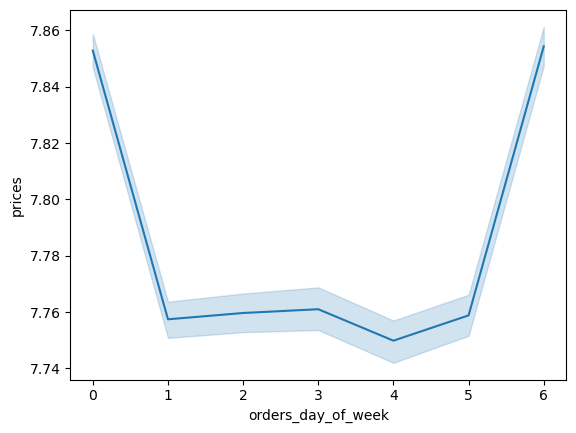

In [22]:
# Creating a line chart of the 30% sample

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [23]:
# Saving the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_4.png'))

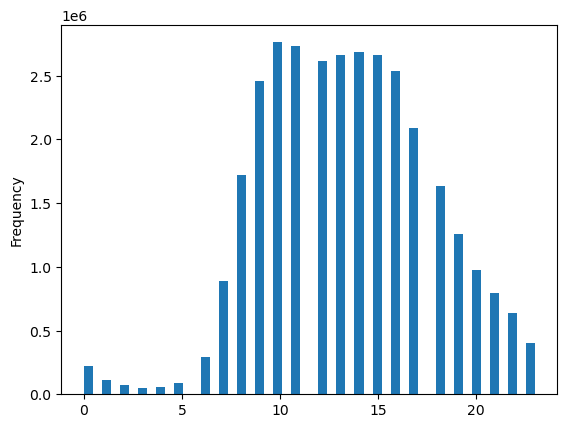

In [24]:
#3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

hist_2 = ords_prods_merge_all['order_hour_of_day'].plot.hist(bins = 50)

In [25]:
# The above histogram demonstrates most of the orders placed are during the middle of the day, between the hours of 9am and 6pm. 

In [26]:
# Save the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hod.png'))

<Axes: xlabel='loyalty_flag'>

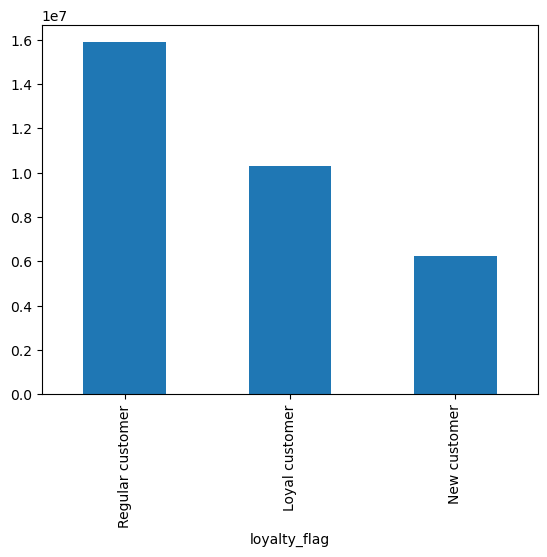

In [27]:
#4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

ords_prods_merge_all['loyalty_flag'].value_counts().plot.bar()

In [28]:
# Saving the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [29]:
# Showing values for each customer shown in the bar chart

ords_prods_merge_all['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [30]:
#5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

df_3 = big[['order_hour_of_day','prices']]

C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


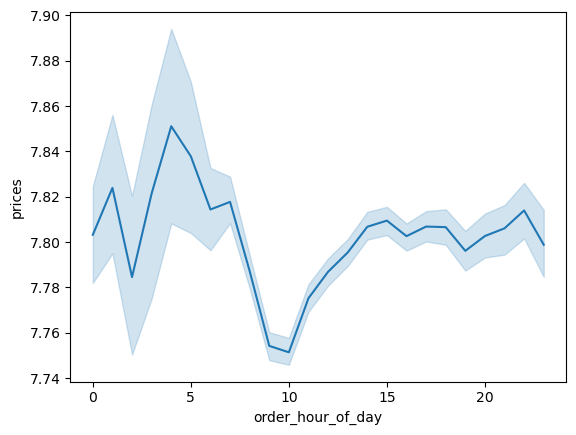

In [31]:
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [32]:
# Saving the line chart

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_hod.png'))

In [33]:
#6 First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

df_4 = big[['Age','number_of_dependants']]

C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


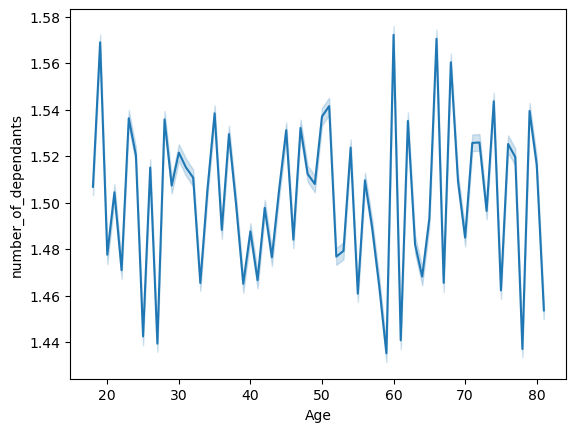

In [34]:
line_3 = sns.lineplot(data = df_4, x = 'Age',y = 'number_of_dependants')

In [35]:
# The line chart does not show a correlation between age and number of dependents. 

In [36]:
# Saving the line chart

line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents_age.png'))

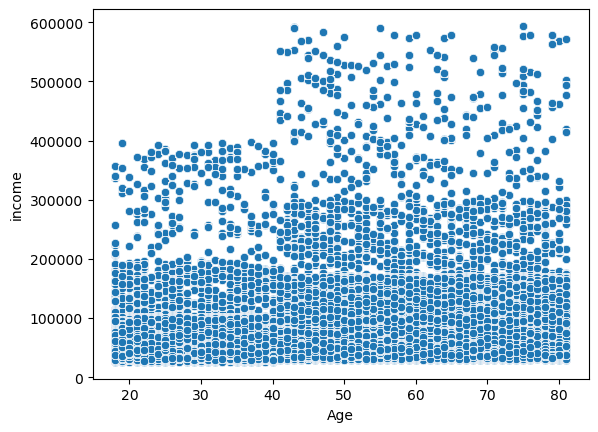

In [44]:
#7 You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

scatter_2 = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_merge_all,)

In [38]:
# The scatterplot shows that prople of all ages have an income of $400,000 and below, but incomes higher tend to be people older than 40.

In [39]:
# Save the scatterplot

scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

<Axes: xlabel='price_range_loc'>

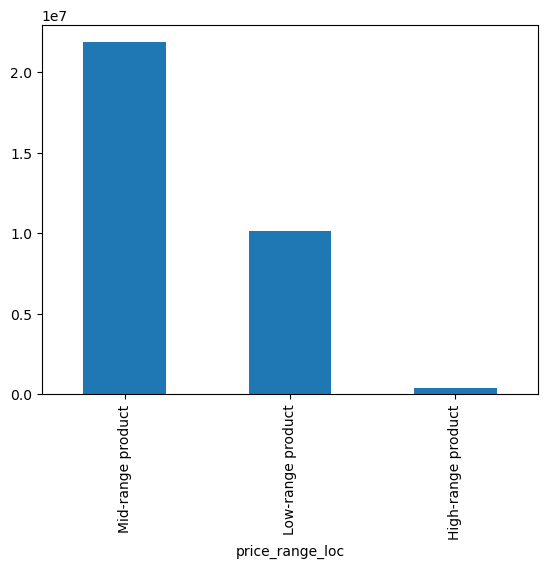

In [40]:
ords_prods_merge_all['price_range_loc'].value_counts().plot.bar()